This notebook file evaluates the performance of ULD applying different metrics: Kullback-Leibler (KL) divergence and 2-Wasserstein distance, following the section 3.3 in the paper. Specifically,

- In **'Task 1'** and **Task 2**, we first check the stationarity conditions for certain choices of target standard deviation $\sigma$, stepsize $\gamma$ and friction coefficient $\eta$ - as we must set them to ensure our chain generated by ULD (equation (3.9) in the paper) is stationary. After that we plot the performance metrics (KL divergence and 2-Wasserstein distance) as a function of (i) stepsize $\gamma$, corresponding to Figure 3.1 of the paper and (ii) friction coefficient $\eta$, corresponding to Figure 3.3 of the paper. Meanwhile, in **Task 1** we also evaluate the divergence of ULD with different values of $\gamma$ taken, as the Figure 3.4 in the paper done.

- The **'Task 3'** implements the sampling performance of the ULD with Markov chain plot and the histogram along with the target density function, where the histogram diagrams are applied in Figure 3.2 of the paper.

- The **Task 4** evaluates the rate of convergence by using computational 1-Wasserstein distance (provided in python package) as a function of time, between the distribution of ULD chain at each time and the target distribution $p^\star$. This corresponds to Figure 3.5 to 3.7 in the paper.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

## Task 1

In [6]:
def stationary_var_underdamped(sigma, gam, eta):
    """Return the variance of stationary distribution generated by underdamped LA.

    Args:
        sigma (float): standard deviation of the target distribution p_star.
        gam (np.array): stepsize selected.
        eta (float): the friction coefficient.
        
    Return:
        float: the variance of stationary distribution of ULA.
    """
    
    num = (2 * eta * sigma**4) * (eta * gam * sigma**2 - gam**2 - 2 * sigma**2)
    deno = 2 * eta**2 * gam * sigma**4 - 3 * eta * gam**2 * sigma**2 - 4 * eta * sigma**4 + gam**3 + 4 * gam * sigma**2 
    
    return num / deno


def KL_divergence(var_p, var_q):
    """Calculate the KL divergence for 1D normal distributions with the same mean.

    Args:
        var_p (float): the variance of the target distribution, p_star.
        var_q (float): the variance of the investigated distribution.

    Returns:
        float: the KL divergence between to distributions, to measure their differences.
    """
    
    return 1/2 * (np.log(var_q / var_p) + var_p / var_q - 1)
    
    
def W2(var_p, var_q):
    """Calculate the 2-Wasserstein distance for 1D normal distribution, with the same mean.

    Args:
        var_p (float): the variance of the target distribution, p_star.
        var_q (float): the variance of the investigated distribution.

    Returns:
        float: the 2-Wasserstein distance between to distributions, to measure their differences.
    """
    return (np.sqrt(var_p) - np.sqrt(var_q))**2

In [7]:
def stationarity_check(sigma, gam, eta):
    """Check whether the selected parameters hold the stationarity.

    Args:
        sigma (float): standard deviation of the target distribution p_star.
        gam (np.array): stepsize selected.
        eta (float): the friction coefficient.
    """
    
    det = (gam * eta - 2)**2 - 4 * (1 - eta * gam + gam**2 / sigma**2)
    if det < 0:
        return 'The determinant is negative.'
    
    deno = 2 * (1 - gam * eta + gam**2 / sigma**2)
    num1 = 2 - eta * gam + np.sqrt(det)
    num2 = 2 - eta * gam - np.sqrt(det)
    val1, val2 = num1 / deno, num2 / deno
    
    # Stationarity check
    if (np.abs(val1) <= 1) or (np.abs(val2) <= 1):
        return 'The stationarity condition fails. The process is not stationary with these paramters.'
    
    return 'The process is stationary with these parameters.'
    

In [8]:
gam_range = np.linspace(0.001, 1.5, 10)  # Define the stepsize range used for plot
var_q = stationary_var_underdamped(1, gam_range, eta=2)  # calculate the stationary variance, with target variance be 1

for i in range(10):
    print(stationarity_check(1, gam_range[i], 2) == 'The process is stationary with these parameters.')

True
True
True
False
True
True
False
False
False
True


In [9]:
gam_range = np.linspace(0.001, 1, 1000)  # Define the stepsize range used for plot
eta = 5
var_q = stationary_var_underdamped(1, gam_range, eta)  # calculate the stationary variance, with target variance be 1

KL_divergence_arr = np.zeros(1000)  # initialise

stationarity_check(1, 0.2, eta) == 'The process is stationary with these parameters.'

True

In [6]:
def stationary_var_ULA(sigma, gam):
    """Return the variance of stationary distribution generated by ULA.

    Args:
        sigma (float): standard deviation of the target distribution p_star.
        gam (np.array): stepsize selected.
        
    Return:
        float: the variance of stationary distribution of ULA.
    """
    
    return (2 * sigma**4) / (2 * sigma**2 - gam)

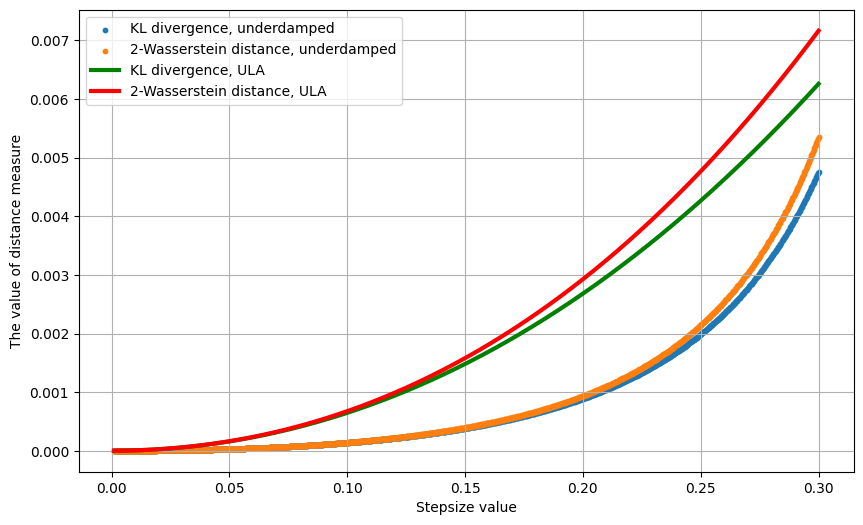

In [7]:
len_gamma_range = 1000
gam_range = np.linspace(0.001, 0.3, len_gamma_range)  # Define the stepsize range used for plot
eta = 5
var_q = stationary_var_underdamped(1, gam_range, eta)  # calculate the stationary variance, with target variance be 1

KL_divergence_arr = np.zeros(len_gamma_range)  # initialise
W2_arr = np.zeros(len_gamma_range)  # initialise

for i in range(len_gamma_range):
    # Drop parameters that causes non-stationarity
    if stationarity_check(1, gam_range[i], eta) == 'The process is stationary with these parameters.':
        if var_q[i] >= 0:  # avoid next variance values
            KL_divergence_arr[i] = KL_divergence(1, var_q[i])
            W2_arr[i] = W2(1, var_q[i])
            
# Extract the terms with non-zero KL divergence, into the new array KL_divergence_arr_non_zero
# and record the corresponding gamma into KL_gam_range_non_zero
KL_divergence_arr_non_zero = np.copy(KL_divergence_arr)
KL_extract_indices_boolean_arr = (KL_divergence_arr != 0)
KL_divergence_arr_non_zero = KL_divergence_arr_non_zero[KL_extract_indices_boolean_arr]
KL_gam_range_non_zero = np.copy(gam_range)
KL_gam_range_non_zero = KL_gam_range_non_zero[KL_extract_indices_boolean_arr]

# Extract the terms with non-zero W2 distance, into the new array W2_arr_non_zero
# and record the corresponding gamma into W2_gam_range_non_zero
W2_arr_non_zero = np.copy(W2_arr)
W2_extract_indices_boolean_arr = (W2_arr != 0)
W2_arr_non_zero = W2_arr_non_zero[W2_extract_indices_boolean_arr]
W2_gam_range_non_zero = np.copy(gam_range)
W2_gam_range_non_zero = W2_gam_range_non_zero[W2_extract_indices_boolean_arr]


# For comparison with ULA
var_q_ULA = stationary_var_ULA(1, gam_range)

plt.figure(figsize=(10,6))

plt.scatter(KL_gam_range_non_zero, KL_divergence_arr_non_zero, label = 'KL divergence, underdamped', s = 10)
plt.scatter(W2_gam_range_non_zero, W2_arr_non_zero, label = '2-Wasserstein distance, underdamped', s = 10)

plt.plot(gam_range, KL_divergence(1, var_q_ULA), label = 'KL divergence, ULA', color = 'g', linewidth = 3)
plt.plot(gam_range, W2(1, var_q_ULA), label = '2-Wasserstein distance, ULA', color = 'r', linewidth = 3)

plt.xlabel('Stepsize value')
plt.ylabel('The value of distance measure')

plt.grid()
plt.legend()
plt.show()

A more detailed graph with a even larger $\eta$.

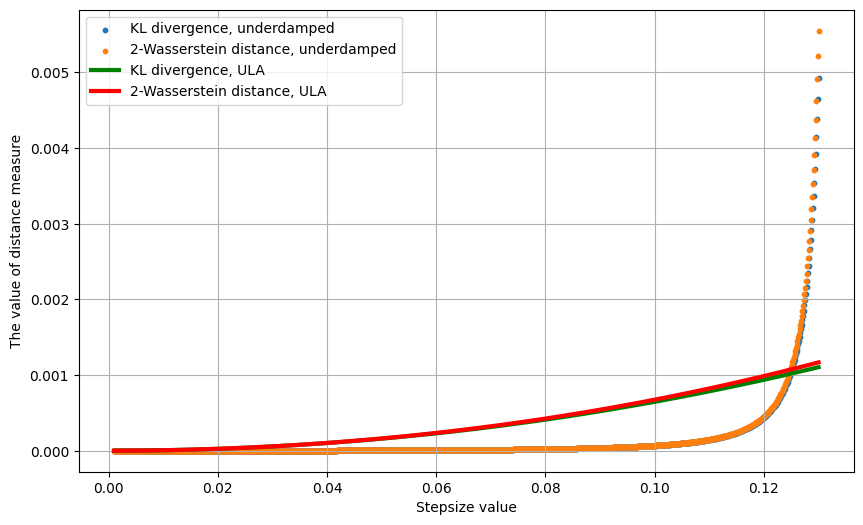

In [8]:
len_gamma_range = 1000
gam_range = np.linspace(0.001, 0.13, len_gamma_range)  # Define the stepsize range used for plot
eta = 15
var_q = stationary_var_underdamped(1, gam_range, eta)  # calculate the stationary variance, with target variance be 1

KL_divergence_arr = np.zeros(len_gamma_range)  # initialise
W2_arr = np.zeros(len_gamma_range)  # initialise

for i in range(len_gamma_range):
    # Drop parameters that causes non-stationarity
    if stationarity_check(1, gam_range[i], eta) == 'The process is stationary with these parameters.':
        if var_q[i] >= 0:  # avoid next variance values
            KL_divergence_arr[i] = KL_divergence(1, var_q[i])
            W2_arr[i] = W2(1, var_q[i])
            
# Extract the terms with non-zero KL divergence, into the new array KL_divergence_arr_non_zero
# and record the corresponding gamma into KL_gam_range_non_zero
KL_divergence_arr_non_zero = np.copy(KL_divergence_arr)
KL_extract_indices_boolean_arr = (KL_divergence_arr != 0)
KL_divergence_arr_non_zero = KL_divergence_arr_non_zero[KL_extract_indices_boolean_arr]
KL_gam_range_non_zero = np.copy(gam_range)
KL_gam_range_non_zero = KL_gam_range_non_zero[KL_extract_indices_boolean_arr]

# Extract the terms with non-zero W2 distance, into the new array W2_arr_non_zero
# and record the corresponding gamma into W2_gam_range_non_zero
W2_arr_non_zero = np.copy(W2_arr)
W2_extract_indices_boolean_arr = (W2_arr != 0)
W2_arr_non_zero = W2_arr_non_zero[W2_extract_indices_boolean_arr]
W2_gam_range_non_zero = np.copy(gam_range)
W2_gam_range_non_zero = W2_gam_range_non_zero[W2_extract_indices_boolean_arr]


# For comparison with ULA
var_q_ULA = stationary_var_ULA(1, gam_range)

plt.figure(figsize=(10,6))

plt.scatter(KL_gam_range_non_zero, KL_divergence_arr_non_zero, label = 'KL divergence, underdamped', s = 10)
plt.scatter(W2_gam_range_non_zero, W2_arr_non_zero, label = '2-Wasserstein distance, underdamped', s = 10)

plt.plot(gam_range, KL_divergence(1, var_q_ULA), label = 'KL divergence, ULA', color = 'g', linewidth = 3)
plt.plot(gam_range, W2(1, var_q_ULA), label = '2-Wasserstein distance, ULA', color = 'r', linewidth = 3)

plt.xlabel('Stepsize value')
plt.ylabel('The value of distance measure')

plt.grid()
plt.legend()
plt.show()

## Task 2

Also try to plot the Wasserstein distance against fricition graph, with fixed stepsize $\gamma = 0.2$.

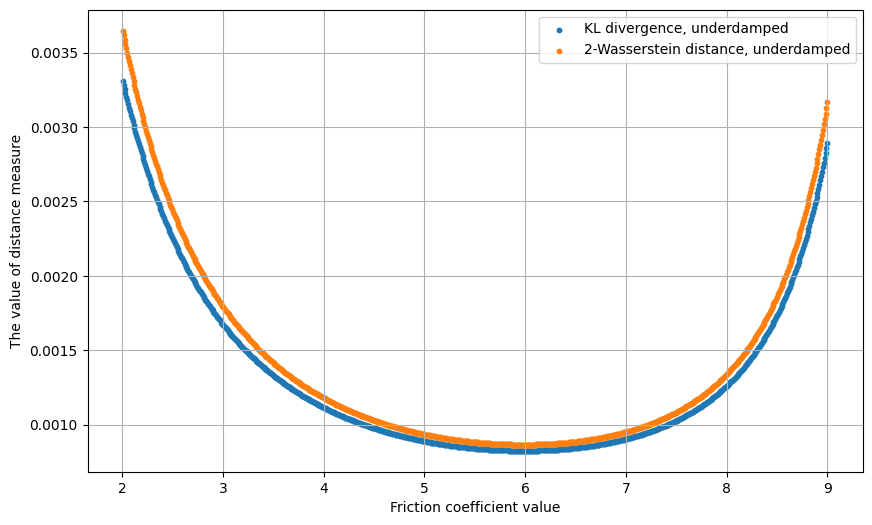

In [9]:
len_eta_range = 1000
eta_range = np.linspace(0.1, 9, len_eta_range)  # Define the friction range used for plot
gam = 0.2
var_q = stationary_var_underdamped(1, gam, eta_range)  # calculate the stationary variance, with target variance be 1

KL_divergence_arr = np.zeros(len_eta_range)  # initialise
W2_arr = np.zeros(len_eta_range)  # initialise

for i in range(len_gamma_range):
    # Drop parameters that causes non-stationarity
    if stationarity_check(1, gam, eta_range[i]) == 'The process is stationary with these parameters.':
        if var_q[i] >= 0:  # avoid next variance values
            KL_divergence_arr[i] = KL_divergence(1, var_q[i])
            W2_arr[i] = W2(1, var_q[i])
            
# Extract the terms with non-zero KL divergence, into the new array KL_divergence_arr_non_zero
# and record the corresponding gamma into KL_gam_range_non_zero
KL_divergence_arr_non_zero = np.copy(KL_divergence_arr)
KL_extract_indices_boolean_arr = (KL_divergence_arr != 0)
KL_divergence_arr_non_zero = KL_divergence_arr_non_zero[KL_extract_indices_boolean_arr]
KL_eta_range_non_zero = np.copy(eta_range)
KL_eta_range_non_zero = KL_eta_range_non_zero[KL_extract_indices_boolean_arr]

# Extract the terms with non-zero W2 distance, into the new array W2_arr_non_zero
# and record the corresponding gamma into W2_gam_range_non_zero
W2_arr_non_zero = np.copy(W2_arr)
W2_extract_indices_boolean_arr = (W2_arr != 0)
W2_arr_non_zero = W2_arr_non_zero[W2_extract_indices_boolean_arr]
W2_eta_range_non_zero = np.copy(eta_range)
W2_eta_range_non_zero = W2_eta_range_non_zero[W2_extract_indices_boolean_arr]


# For comparison with ULA
# var_q_ULA = stationary_var_ULA(1, gam_range)

plt.figure(figsize=(10,6))

plt.scatter(KL_eta_range_non_zero, KL_divergence_arr_non_zero, label = 'KL divergence, underdamped', s = 10)
plt.scatter(W2_eta_range_non_zero, W2_arr_non_zero, label = '2-Wasserstein distance, underdamped', s = 10)

#plt.plot(gam_range, KL_divergence(1, var_q_ULA), label = 'KL divergence, ULA', color = 'g', linewidth = 3)
#plt.plot(gam_range, W2(1, var_q_ULA), label = '2-Wasserstein distance, ULA', color = 'r', linewidth = 3)

plt.xlabel('Friction coefficient value')
plt.ylabel('The value of distance measure')

plt.grid()
plt.legend()
plt.show()

In [10]:
eta = 10
stationarity_check(1, 0.05, eta) == 'The process is stationary with these parameters.'

True

## Task 3

Underdamped Langevin Algorithm.

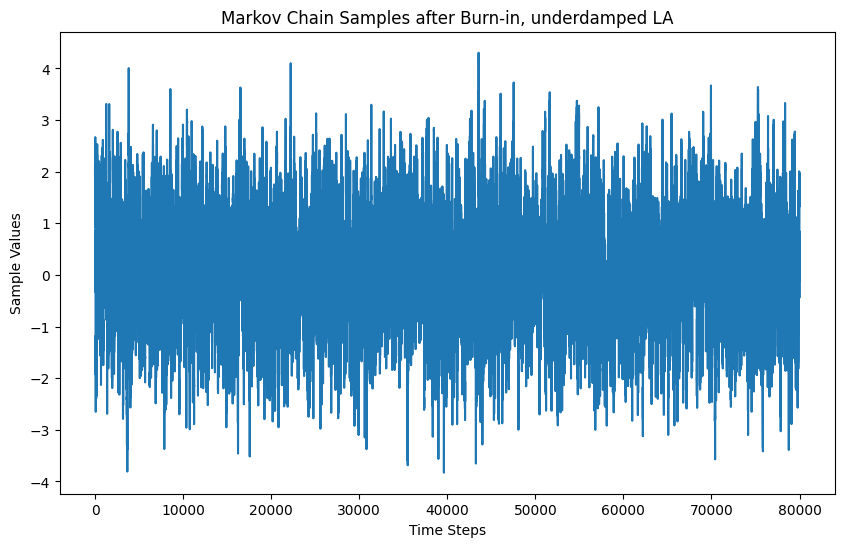

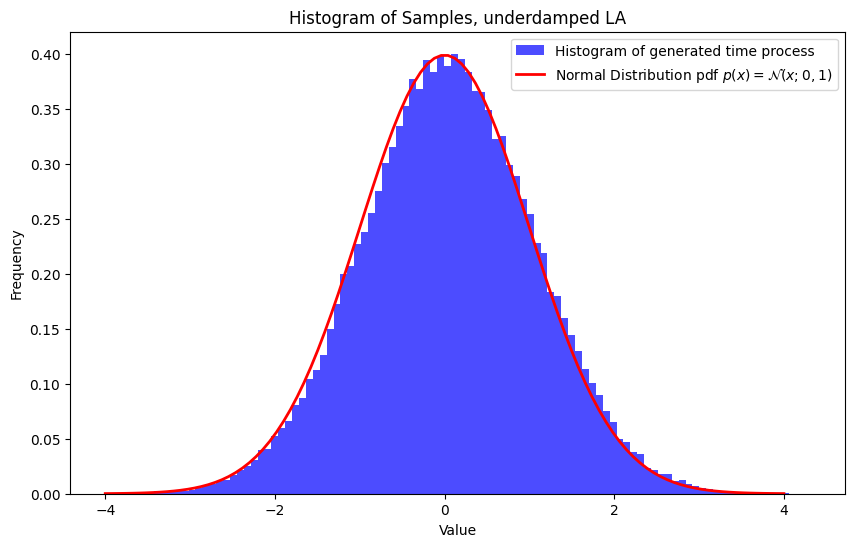

In [5]:
np.random.seed(42)

sample_size = 100000  # sample size N
z0 = [1,1]  # initial value z0
burnin = 20000

z_arr = np.zeros((sample_size,2))  # create z_arr for containing total N samples, the i-th row is z_i = (v_i, x_i), for i=0,1,...,N-1
z_arr[0, :] = z0  # substitution with the initial entry

gamma = 0.20  # gamma as the step size, this should be chosen carefully
eta = 5  # this constant should also be chosen carefully but not randomly pick
mu = 0  # mean of the target p
sigma = 1  # std of the target p

A = np.array([[1-gamma * eta, -gamma/(sigma**2)], [gamma, 1]])  # define the matrix A
b = np.array([gamma * mu/(sigma**2), 0])  # define the vector b
C = np.array([[np.sqrt(2 * gamma * eta), 0], [0, 0]])

# Apply the Underdamped Langevin diffusion here
for t in range(1, sample_size):
    z_prime = A @ z_arr[t-1, :] + b + C @ np.random.normal(0, 1, 2)
    z_arr[t, :] = z_prime

plt.figure(figsize=(10,6))

plt.plot(z_arr[burnin: ,1])  # the second column is the samples for time process X_t, which is samples of p(x)
plt.title('Markov Chain Samples after Burn-in, underdamped LA')
plt.xlabel('Time Steps')
plt.ylabel('Sample Values')
plt.show()

# Plotting the histogram and the density function
x = np.linspace(-4,4,100)
pdf_normal = norm.pdf(x, loc = 0, scale = 1)  # N(0, 1) distribution

plt.figure(figsize=(10,6))
plt.hist(z_arr[burnin: ,1], bins=100, density=True, color='blue', alpha=0.7, label = 'Histogram of generated time process')
plt.plot(x, pdf_normal, color='red', lw=2, label='Normal Distribution pdf $p(x) = \mathcal{N}(x;0,1)$')
plt.title('Histogram of Samples, underdamped LA')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

A too small stepsize $\gamma$ results slow convergence.

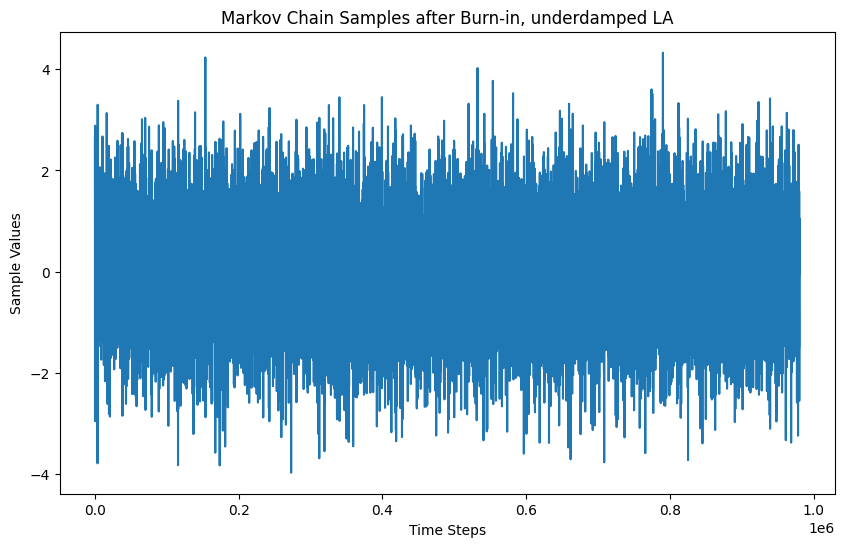

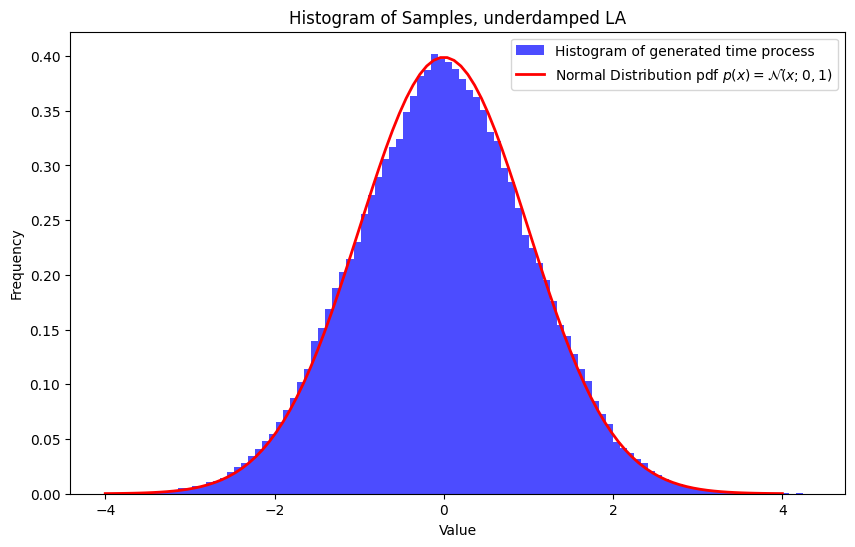

In [4]:
np.random.seed(42)

sample_size = 1000000  # sample size N
z0 = [1,1]  # initial value z0
burnin = 20000

z_arr = np.zeros((sample_size,2))  # create z_arr for containing total N samples, the i-th row is z_i = (v_i, x_i), for i=0,1,...,N-1
z_arr[0, :] = z0  # substitution with the initial entry

gamma = 0.02  # gamma as the step size, this should be chosen carefully
eta = 0.5  # this constant should also be chosen carefully but not randomly pick
mu = 0  # mean of the target p
sigma = 1  # std of the target p

A = np.array([[1-gamma * eta, -gamma/(sigma**2)], [gamma, 1]])  # define the matrix A
b = np.array([gamma * mu/(sigma**2), 0])  # define the vector b
C = np.array([[np.sqrt(2 * gamma * eta), 0], [0, 0]])

# Apply the Underdamped Langevin diffusion here
for t in range(1, sample_size):
    z_prime = A @ z_arr[t-1, :] + b + C @ np.random.normal(0, 1, 2)
    z_arr[t, :] = z_prime

plt.figure(figsize=(10,6))

plt.plot(z_arr[burnin: ,1])  # the second column is the samples for time process X_t, which is samples of p(x)
plt.title('Markov Chain Samples after Burn-in, underdamped LA')
plt.xlabel('Time Steps')
plt.ylabel('Sample Values')
plt.show()

# Plotting the histogram and the density function
x = np.linspace(-4,4,100)
pdf_normal = norm.pdf(x, loc = 0, scale = 1)  # N(0, 1) distribution

plt.figure(figsize=(10,6))
plt.hist(z_arr[burnin: ,1], bins=100, density=True, color='blue', alpha=0.7, label = 'Histogram of generated time process')
plt.plot(x, pdf_normal, color='red', lw=2, label='Normal Distribution pdf $p(x) = \mathcal{N}(x;0,1)$')
plt.title('Histogram of Samples, underdamped LA')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Task 4

Try to deduce the distribution of $\mathbf{Z}_t$ at each time $t$.

In [4]:
# Codes for calculate the vec(s0)
from sympy import symbols, Matrix, Add, simplify

# Define symbolic variables
gamma, eta, sigma = symbols('gamma eta sigma')

# Define matrix A
A = Matrix([
    [1 - gamma * eta, -gamma / sigma**2],
    [gamma, 1]
])

CCT = Matrix([
    [2 * eta * gamma, 0],
    [0, 0]
])

matrix_list = []
marginal_variance_Xt = []
for i in range(4):
    matrix_list.append(A**i @ CCT @ A.T**i)
    marginal_variance_Xt.append((A**i @ CCT @ A.T**i)[1,1])
        
simplify(Add(*marginal_variance_Xt))

2*eta*gamma**3*(sigma**4*((eta*gamma - 2)**2 + 1) + (eta**2*gamma**2*sigma**2 - 3*eta*gamma*sigma**2 - gamma**2 + 3*sigma**2)**2)/sigma**4

In [14]:
np.random.seed(42)

mean = [0,0]
covariance_matrix = np.array([[1,0], [0,1]])

print(np.random.multivariate_normal(mean, covariance_matrix, size=10))

np.random.multivariate_normal(mean, covariance_matrix, size=10)[:, 1]

[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]
 [-1.72491783 -0.56228753]
 [-1.01283112  0.31424733]
 [-0.90802408 -1.4123037 ]]


array([-0.2257763 , -1.42474819,  0.11092259,  0.37569802, -0.29169375,
        1.85227818, -1.05771093, -1.22084365, -1.95967012,  0.19686124])

In [17]:
mu_p, mu_q = 0, 0
var_p = 1
var_q = stationary_var_underdamped(1, 0.2, 5)

W1(mu_p, mu_q, var_p, var_q)

0.02915046824604077

In [18]:
stationarity_check(1, 0.2, 5)

'The process is stationary with these parameters.'

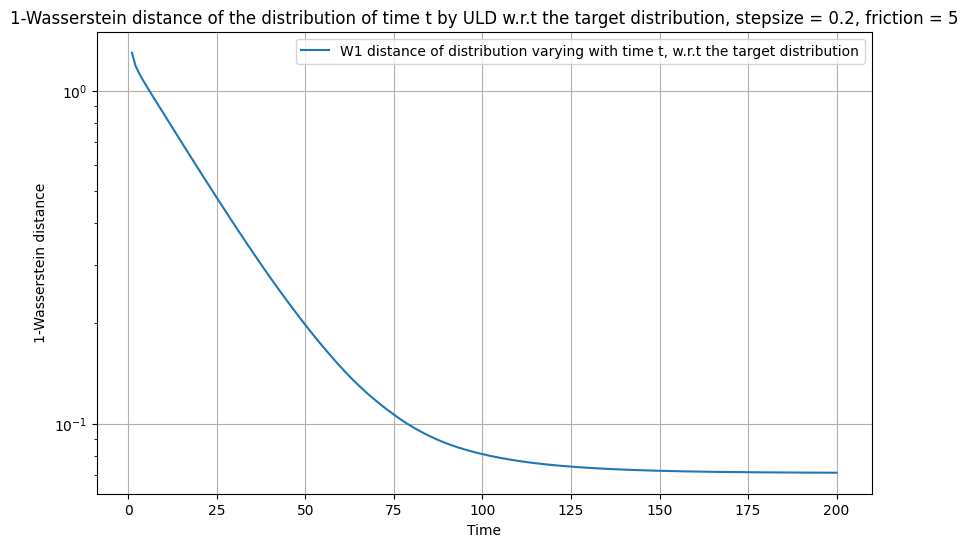

In [13]:
from scipy.stats import wasserstein_distance
from numpy.linalg import matrix_power

np.random.seed(42)

target_sample = np.random.normal(loc=0, scale=1, size=1000)  # sampling target
time_array = 1 + np.arange(200)  # start time at 1
#gam_range = [0.02, 0.2]  # need to change for taking multiple values
eta = 5
gam = 0.2
marginal_sample = np.random.normal(loc = 0, scale = np.sqrt(stationary_var_underdamped(1, gam, eta)), size=1000)  # sampling marginal density

z0 = [1,1]  # initial value for the chain
b = [0,0]

A = np.array([[1 - gam * eta, -gam], 
              [gam, 1]])
CCT = np.array([[2 * gam * eta, 0],
                [0, 0]])

W1_distance_list = []  # initialisation
marginal_var = stationary_var_underdamped(1, gam, eta)


for time in time_array:
    np.random.seed(42)
    mean = matrix_power(A, time) @ z0 + sum([(matrix_power(A, t) @ b) for t in range(time)])
    covariance_matrix = sum([((matrix_power(A, t)) @ CCT @ (matrix_power(A, t).T)) for t in range(time)])
    joint_sample = np.random.multivariate_normal(mean, covariance_matrix, size=1000)
    W1_distance_list.append(wasserstein_distance(joint_sample[:, 1], target_sample))
    

plt.figure(figsize=(10,6))
plt.plot(time_array, W1_distance_list,
         label = 'W1 distance of distribution varying with time t, w.r.t the target distribution')
#plt.axhline(wasserstein_distance(marginal_sample, target_sample), color='red', linestyle='--', 
#            label='W1 distance of stationary marginal distribution w.r.t the target distribution')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('1-Wasserstein distance')
plt.title('1-Wasserstein distance of the distribution of time t by ULD w.r.t the target distribution, stepsize = 0.2, friction = 5')

plt.grid()
plt.legend()
plt.show()

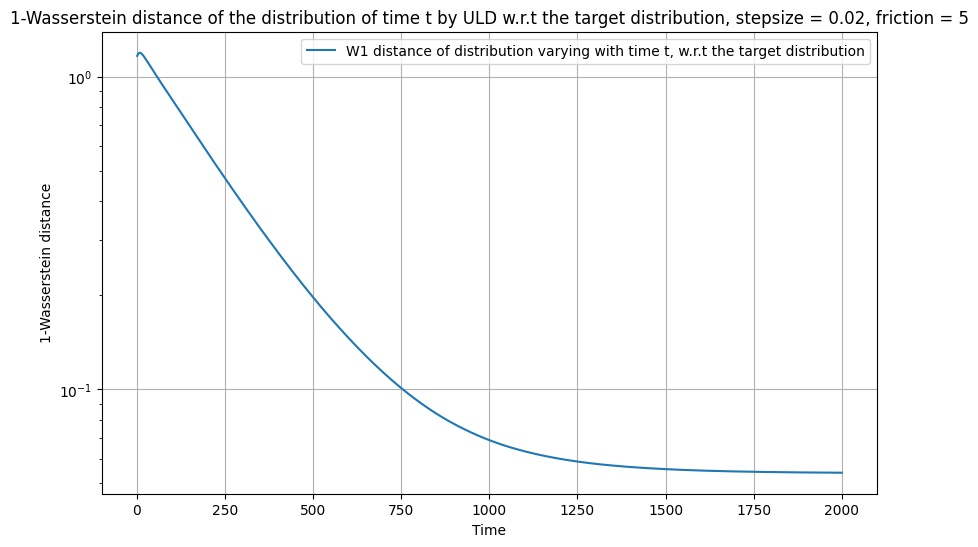

In [26]:
from scipy.stats import wasserstein_distance
from numpy.linalg import matrix_power

np.random.seed(42)

target_sample = np.random.normal(loc=0, scale=1, size=1000)  # sampling target
time_array = 1 + np.arange(2000)  # start time at 1
#gam_range = [0.02, 0.2]  # need to change for taking multiple values
eta = 5
gam = 0.02

z0 = [1,1]  # initial value for the chain
b = [0,0]

A = np.array([[1 - gam * eta, -gam], 
              [gam, 1]])
CCT = np.array([[2 * gam * eta, 0],
                [0, 0]])

W1_distance_list = []  # initialisation
marginal_var = stationary_var_underdamped(1, gam, eta)


for time in time_array:
    np.random.seed(42)
    mean = matrix_power(A, time) @ z0 + sum([(matrix_power(A, t) @ b) for t in range(time)])
    covariance_matrix = sum([((matrix_power(A, t)) @ CCT @ (matrix_power(A, t).T)) for t in range(time)])
    joint_sample = np.random.multivariate_normal(mean, covariance_matrix, size=1000)
    W1_distance_list.append(wasserstein_distance(joint_sample[:, 1], target_sample))
    

plt.figure(figsize=(10,6))
plt.plot(time_array, W1_distance_list,
         label = 'W1 distance of distribution varying with time t, w.r.t the target distribution')
#plt.axhline(y=W1(1, marginal_var), color='red', linestyle='--', 
#            label='W1 distance of stationary marginal distribution w.r.t the target distribution')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('1-Wasserstein distance')
plt.title('1-Wasserstein distance of the distribution of time t by ULD w.r.t the target distribution, stepsize = 0.02, friction = 5')

plt.grid()
plt.legend()
plt.show()

In [83]:
sample1 = np.random.normal(loc=0, scale=1, size=100000)
sample2 = np.random.normal(loc=0, scale=2, size=100000)
wasserstein_distance(sample1, sample2)

0.8008461998529034

In [104]:
W1(0,0,1,4)

0.6453491377408588

Investigate the autocovariance/autocorrlation for different stepsizes. This time we fix $\eta = 5$.

In [10]:
def ULD_variance(sigma, gam, eta):
    """Compute the variance matrix s0 for ULD.

    Args:
        sigma (np.float): standard deviation of target distribution.
        gam (np.float): stepsize.
        eta (np.float): friction coefficient.

    Returns:
        np.array: the variance matrix s0.
    """
    
    num = [-4 * eta * sigma**4, 2 * eta * gam * sigma**4, (2 * eta * sigma**4) * (eta * gam * sigma**2 - gam**2 - 2 * sigma**2)]
    deno = 2 * eta**2 * gam * sigma**4 - 3 * eta * gam**2 * sigma**2 - 4 * eta * sigma**4 + gam**3 + 4 * gam * sigma**2
    s0 = np.array([[num[0]/deno, num[1]/deno],
                   [num[1]/deno, num[2]/deno]])
    
    return s0


def acr_computation(sigma, gam, eta, time_array):
    """Compute the autocorrelation (for position chain Xt) at time t.

    Args:
        sigma (np.float): standard deviation of target distribution.
        gam (np.float): stepsize.
        eta (np.float): friction coefficient.
        time_array (np.array): (discrete) time array, with integers as entries.

    Returns:
        np.array: the autocorrelation for position chain Xt at time t.
    """
    A = np.array([[1 - gam * eta, -gam / sigma**2], 
              [gam, 1]])
    s0 = ULD_variance(sigma, gam, eta)
    
    acr_chain_Xt = []  # initialise
    
    for t in time_array:
        acr_chain_Xt.append((s0 @ matrix_power(A, t).T)[1,1] / s0[1,1])
    
    return acr_chain_Xt

In [11]:
stationarity_check(1, 0.2, 2)

'The process is stationary with these parameters.'

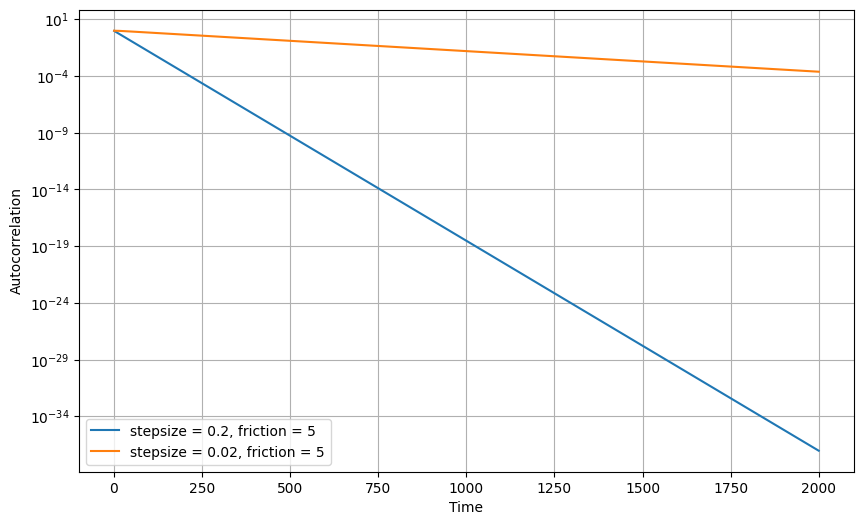

: 

In [15]:
time_array = 1 + np.arange(2000)  # start time at 1

plt.figure(figsize=(10,6))
plt.plot(time_array, acr_computation(1, 0.2, 5, time_array), label = 'stepsize = 0.2, friction = 5')
#plt.plot(time_array, acr_computation(1, 0.2, 6, time_array), label = 'stepsize = 0.2, friction = 6')
plt.plot(time_array, acr_computation(1, 0.02, 5, time_array), label = 'stepsize = 0.02, friction = 5')

plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('Autocorrelation')

plt.grid()
plt.legend()
plt.show()